In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Notebook to learn colormaps and normalization in matplotlib

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

Define a simple test array

In [4]:
x = np.arange(0,12).reshape(3,4)

There are several kinds of normalization.  I investigate linear normalization and defined boundaries.  All normalization methods produce objects that can be fed a scalar or array as an argument or sent to a plotting method such as imshow or pcolormesh.

Linear normalization spreads values linearly between vmin and vmax.  The boundary norm performs a similar procedure to histogram given a set of levels.  These levels are then distributed across the colormap.

In [5]:
# Get a colormap object.  This can be used to define the number of colors sent to BoundaryNorm.
cmap = plt.get_cmap('Reds')

# Define linear normalization.  I want to cut the colorbar at 0.1, effectively setting small values to 
# missing.  In this case I set clip to False so I can use the cmap object methods set_under and set_over 
# to define a color for values outside the range defined by vmin and vmax.
lnorm = mcolors.Normalize(vmin=0.1, vmax=10, clip=False)

# Define the Boundary Normalization.  Levels sets the discrete boundaries, where the first class is between
# 1 and 2, the next between 2 and 3, and so on.  cmap.N is the number of colors in the color map.
levels = [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]
bnorm = mcolors.BoundaryNorm(levels,cmap.N,clip=False)

The norm objects can be passed arrays.  In the first output, the array is spread over the interval 0. to 1., except for values that fall outside the range set by vmin and vmax.

The second output returns the indices of the colormap members.  Values outside the range are set to -1 and 256.  The colormap, in this case has 256 members.  If clip is set to True, values outside the range are set to 0, for values less than the lower boundary, and 255 (or cmap.N-1), for values abover the upper boundary.

In [6]:
print lnorm(x)
print bnorm(x)

[[-0.01010101  0.09090909  0.19191919  0.29292929]
 [ 0.39393939  0.49494949  0.5959596   0.6969697 ]
 [ 0.7979798   0.8989899   1.          1.1010101 ]]
[[-1 0 28 56]
 [85 113 141 170]
 [198 226 255 256]]


Colors for values outside the range specified in the norm object can be set using the set_under and set_over methods.  In this case, I set these to white.

In [7]:
cmap.set_under('white')
cmap.set_over('white')

In this example, the main difference is that BoundaryNorm gives discrete color levels, while Normalize gives a continuous color range.

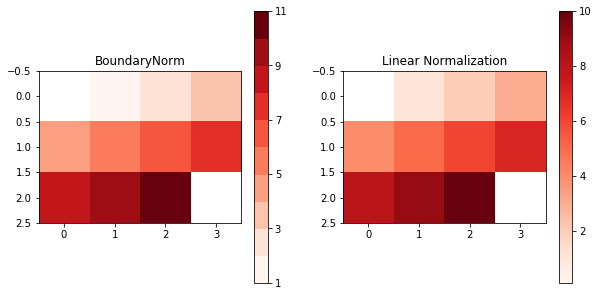

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

img1 = ax[0].imshow(x, cmap=cmap, norm=bnorm)
ax[0].set_title('BoundaryNorm')
plt.colorbar(img1, ax=ax[0])

img2 = ax[1].imshow(x, cmap=cmap, norm=lnorm)
ax[1].set_title('Linear Normalization')
plt.colorbar(img2, ax=ax[1])

Now we'll try it with real data

In [9]:
import xarray as xr
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [10]:
diri = r'F:\Data\APHRODITE'
fili = 'APHRO_MA_025deg_V1101R2.2007.day.nc'
ds = xr.open_dataset(os.path.join(diri,fili))

In [11]:
def get_extent(da):
    """
    Returns the extent of an APHRODITE image
    """

    dlat = (da.coords['lat'][1] - da.coords['lat'][0]).values
    dlon = (da.coords['lon'][1] - da.coords['lon'][0]).values

    return [da.coords['lon'][0].values-dlon*0.5,
            da.coords['lon'][-1].values+dlon*0.5,
            da.coords['lat'][0].values-dlat*0.5,
            da.coords['lat'][-1].values+dlat*0.5]


In [12]:
# Colorbar with NSW Precip colors
nws_precip_colors = [
        "#04e9e7",  # 0.01 - 0.10 inches
        "#019ff4",  # 0.10 - 0.25 inches
        "#0300f4",  # 0.25 - 0.50 inches
        "#02fd02",  # 0.50 - 0.75 inches
        "#01c501",  # 0.75 - 1.00 inches
        "#008e00",  # 1.00 - 1.50 inches
        "#fdf802",  # 1.50 - 2.00 inches
        "#e5bc00",  # 2.00 - 2.50 inches
        "#fd9500",  # 2.50 - 3.00 inches
        "#fd0000",  # 3.00 - 4.00 inches
        "#d40000",  # 4.00 - 5.00 inches
        "#bc0000",  # 5.00 - 6.00 inches
        "#f800fd",  # 6.00 - 8.00 inches
        "#9854c6",  # 8.00 - 10.00 inches
        "#fdfdfd"   # 10.00+
    ]
precip_colormap = mcolors.ListedColormap(nws_precip_colors)
precip_colormap.set_under('white')

levels = [0.2, 2.5, 5., 10., 20., 30., 40., 50., 60., 80., 100., 125., 150., 200., 250., 500.]
#[0.01, 25., 50., 75., 100., 125., 150., 175., 200., 
#          225., 250., 275., 300., 325., 1000.]
norm = mcolors.BoundaryNorm(levels, precip_colormap.N, clip=False) 

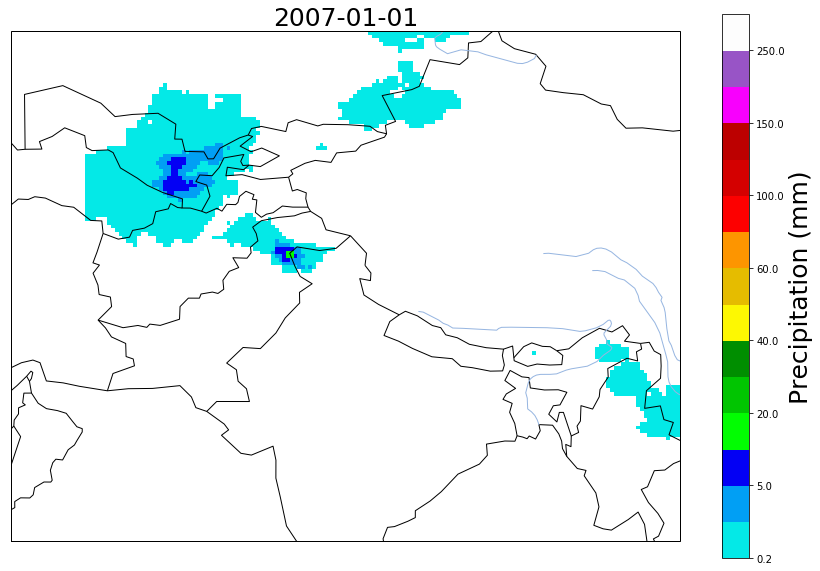

In [13]:
date = '2007-01-01'
image = ds['TOTPREC'].sel(time=date)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([55.,100.,15.,47.])
#ax.set_extent([55.,79.,29.,41.])

imgplot = ax.imshow(image, origin='lower', extent=get_extent(image), 
                    transform=ccrs.PlateCarree(), cmap=precip_colormap, norm=norm)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS)
ax.set_title(date, fontsize=25)

cbar = plt.colorbar(imgplot, ax=ax)
cbar.ax.set_ylabel('Precipitation (mm)', fontsize=25)